## baseline

In [22]:
import pickle
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
experiment_path='/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_1-screw'

with open(experiment_path + "/all_trainscores.pkl", "rb") as file:
    guide_trainscores = pickle.load(file)
with open(experiment_path + "/all_testscores.pkl", "rb") as file:
    guide_testscores = pickle.load(file)
with open(experiment_path + "/experiment_paths.json", 'r') as file:
    exppath_guide = json.load(file)   

guide_arange=np.arange(len(guide_trainscores)+2*len(guide_testscores))
guide_allpaths=exppath_guide['train']+ exppath_guide['test']+ exppath_guide['test']
guide_allscores=guide_trainscores.tolist()+[-1]*len(guide_testscores)+ guide_testscores.tolist()

setcolors={'train':'blue','infer':'red','test':'green'}
anotype_marker={'good':'.','scratch':'_','manipulated_front':'x','scratch_head':'^','scratch_neck':'s','thread_side':'p','thread_top':'D'}
anotype=['good']*len(guide_allscores)
for key in anotype_marker.keys():
    anotype=[key if key in path else anotype[i] for i,path in enumerate(guide_allpaths)]
marker=[anotype_marker[key] for key in anotype]  
df=pd.DataFrame({'guide_paths':guide_allpaths,'clean_1':guide_allscores,"markers":marker})


/tmp/ipykernel_3303733/2825230148.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(df.index[i], df['clean_1'][i], 'o', color='black', marker=df['markers'][i])


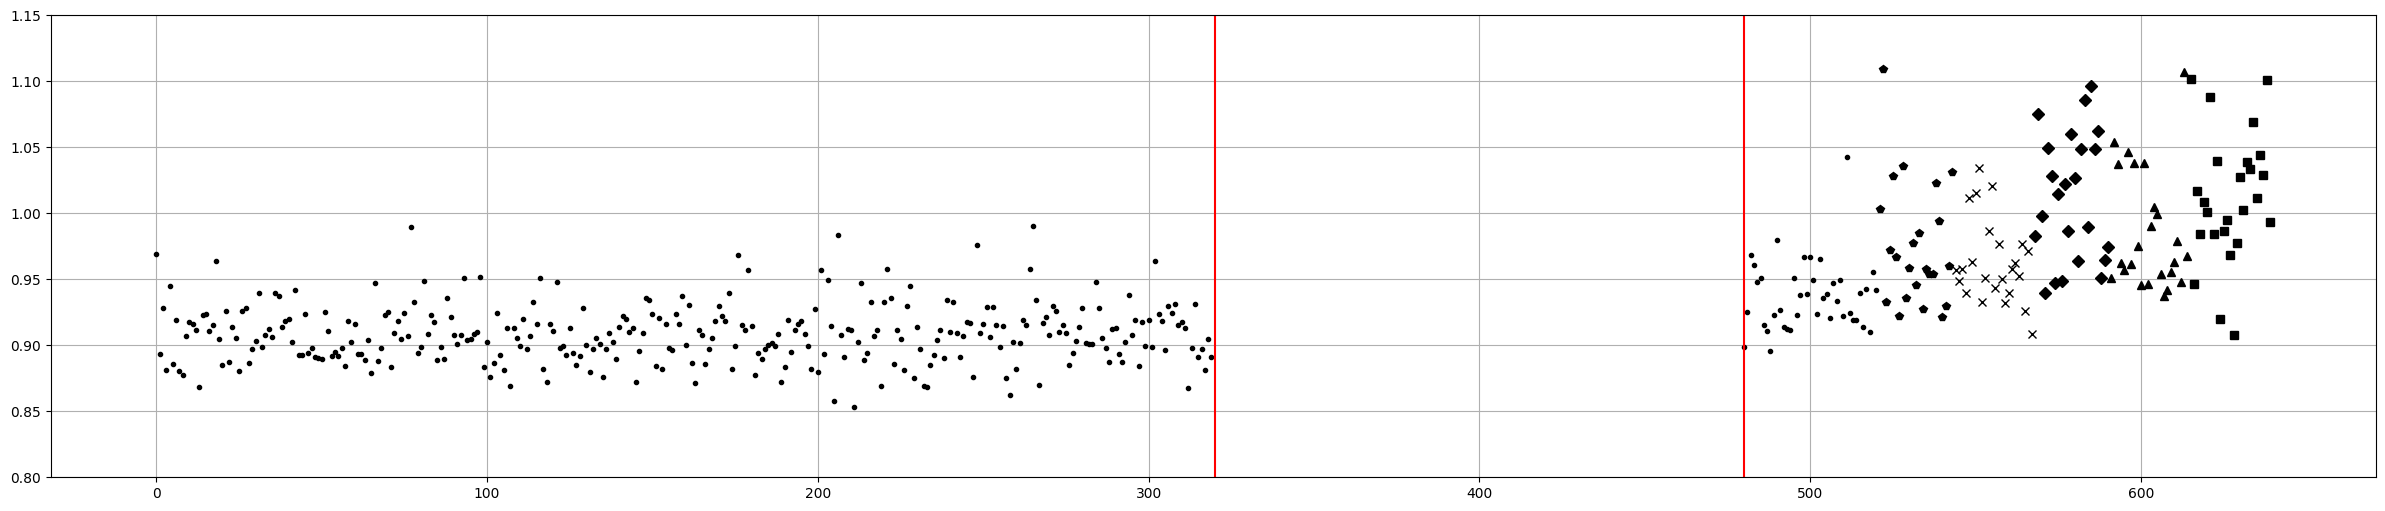

In [46]:
plt.figure(figsize=(30, 6))
for i in range(len(df)):
    plt.plot(df.index[i], df['clean_1'][i], 'o', color='black', marker=df['markers'][i])

plt.ylim(0.8,1.15)
plt.vlines(len(guide_trainscores), 0.8, 1.15, color='red')
plt.vlines(len(guide_trainscores)+len(guide_testscores), 0.8, 1.15, color='red')
plt.grid(True)
